In [20]:
import pandas as pd

In [21]:
fertility_df = pd.read_csv('합계출산율.csv', index_col=0)
apart_df = pd.read_csv('아파트매매가격지수.csv', index_col=0)
population_df = pd.read_csv('인구밀도.csv', index_col=0)
edu_df = pd.read_csv('사교육참여율.csv', index_col=0)
employment_df = pd.read_csv('고용률.csv', index_col=0)
age_df = pd.read_csv('여성초혼연령.csv', index_col=0)
internet_df = pd.read_csv('인터넷이용률.csv', index_col=0)
time_df = pd.read_csv('근로시간.csv', index_col=0)

In [22]:
common_columns = ['시점', '지역']
merged_df = fertility_df
for df in [apart_df, population_df, edu_df, employment_df, age_df, internet_df, time_df]:
    merged_df = pd.merge(merged_df, df, on=common_columns, how='outer')

merged_df = merged_df.reset_index()

# 결측치 처리 및 확인
merged_df = merged_df.dropna()
merged_df.isnull().sum()

시점              0
지역              0
합계출산율(명)        0
아파트매매가격지수(%)    0
인구밀도(명/km2)     0
사교육참여율(%)       0
고용률(%)          0
여성초혼연령(년)       0
인터넷이용률(%)       0
근로시간(시간)        0
dtype: int64

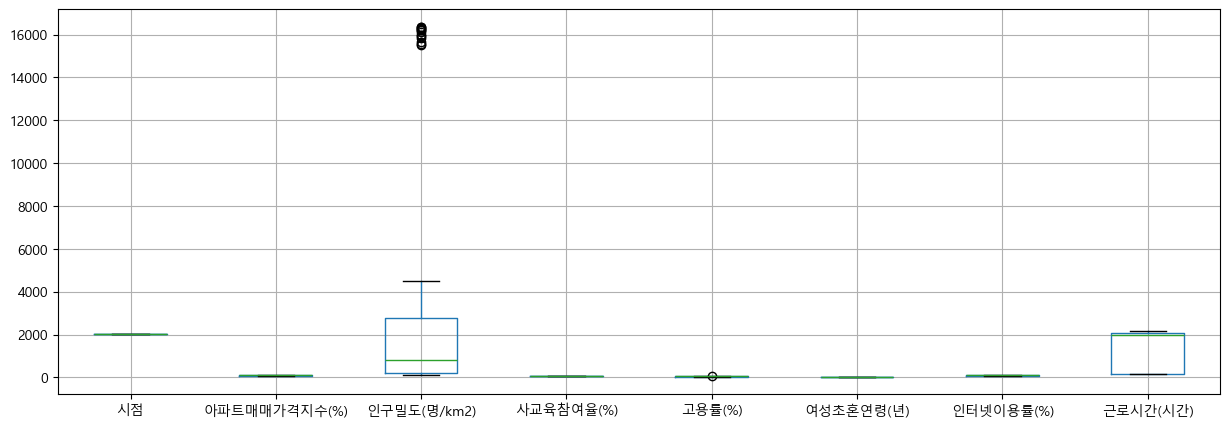

In [23]:
# 이상치 확인 : 제거할 이상치는 없음으로 판단.
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

merged_df.drop('합계출산율(명)', axis=1).boxplot(figsize=(15,5))
plt.show()

In [24]:
merged_df.to_csv('final_merged_data.csv', index=False)

merged_df['시점'].unique(), merged_df['지역'].unique(), merged_df['지역'].nunique(), merged_df

(array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
        2022, 2023], dtype=int64),
 array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '인천',
        '전남', '전북', '제주', '충남', '충북', '세종'], dtype=object),
 17,
        시점  지역 합계출산율(명)  아파트매매가격지수(%)  인구밀도(명/km2)  사교육참여율(%)  고용률(%)  \
 187  2011  강원    1.338        85.758        88.60       61.1    36.3   
 188  2011  경기    1.314        74.467      1140.72       75.4    41.8   
 189  2011  경남    1.446       102.467       303.28       69.4    37.6   
 190  2011  경북    1.434        83.917       137.44       68.5    37.8   
 191  2011  광주    1.234        72.908      2956.24       72.7    37.3   
 ..    ...  ..      ...           ...          ...        ...     ...   
 403  2023  전남    0.972        93.958       143.70       67.3    39.4   
 404  2023  전북    0.780       101.608       219.10       69.8    38.8   
 405  2023  제주    0.827       103.817       365.80       74.8    46.4   
 406  2023  충남    0.84